In [1]:
# For Data Processing
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import random
random.seed(1990)

# For image manipulation
import cv2
import imutils

# For ML Models
from tensorflow import keras
from tensorflow.keras.layers import *
from tensorflow.keras.losses import *
from tensorflow.keras.models import *
from tensorflow.keras.metrics import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.applications import *
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator

# For Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Miscellaneous
from tqdm import tqdm
import os
import random

# Suppress future, deprecation, and SettingWithCopy warnings
import warnings
warnings.filterwarnings("ignore", category= FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
pd.options.mode.chained_assignment = None

# make all columns in a df viewable and wider
pd.options.display.max_columns = None
pd.options.display.width = None
pd.set_option('max_colwidth', 400)

In [2]:
labels = ['pituitary', 'notumor', 'meningioma', 'glioma']
train_dir = '/Users/eli/Desktop/brain_tumor_CNN_classifier/data/Training/'

train_paths = []
train_labels = []

for label in labels:
    for image in os.listdir(train_dir+label):
        train_paths.append(train_dir+label+'/'+image)
        train_labels.append(label)

train_paths, train_labels = shuffle(train_paths, train_labels)

tumor_train_df = pd.concat([pd.Series(train_paths, name = 'paths'), 
                            pd.Series(train_labels, name = 'label')], 
                            axis = 1)
tumor_train_df

,paths,label
0,/Users/eli/Desktop/brain_tumor_CNN_classifier/data/Training/notumor/Tr-no_0205.jpg,notumor
1,/Users/eli/Desktop/brain_tumor_CNN_classifier/data/Training/notumor/Tr-no_0394.jpg,notumor
2,/Users/eli/Desktop/brain_tumor_CNN_classifier/data/Training/pituitary/Tr-pi_0224.jpg,pituitary
3,/Users/eli/Desktop/brain_tumor_CNN_classifier/data/Training/pituitary/Tr-pi_0703.jpg,pituitary
4,/Users/eli/Desktop/brain_tumor_CNN_classifier/data/Training/pituitary/Tr-pi_1325.jpg,pituitary
...,...,...
5707,/Users/eli/Desktop/brain_tumor_CNN_classifier/data/Training/pituitary/Tr-pi_0930.jpg,pituitary
5708,/Users/eli/Desktop/brain_tumor_CNN_classifier/data/Training/notumor/Tr-no_1074.jpg,notumor
5709,/Users/eli/Desktop/brain_tumor_CNN_classifier/data/Training/meningioma/Tr-me_0150.jpg,meningioma
5710,/Users/eli/Desktop/brain_tumor_CNN_classifier/data/Training/meningioma/Tr-me_0715.jpg,meningioma


In [3]:
tumor_train_df.shape

(5712, 2)

In [4]:
tumor_train_df['label'].value_counts(normalize = True)

notumor       0.279237
pituitary     0.255077
meningioma    0.234419
glioma        0.231268
Name: label, dtype: float64

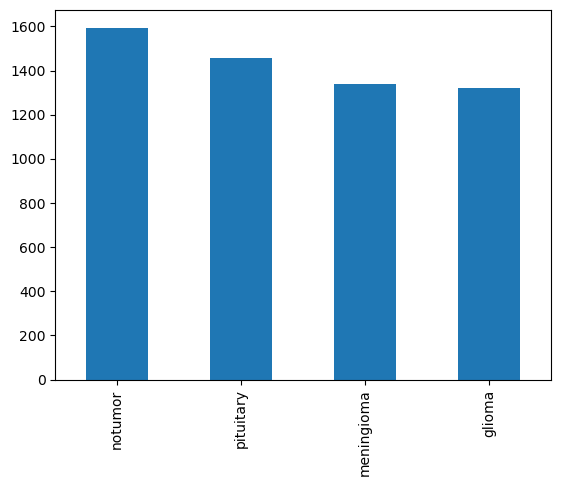

In [5]:
tumor_train_df['label'].value_counts().plot(kind = 'bar');

In [6]:
test_dir = '/Users/eli/Desktop/brain_tumor_CNN_classifier/data/Testing/'

test_paths = []
test_labels = []

for label in labels:
    for image in os.listdir(test_dir+label):
        test_paths.append(test_dir+label+'/'+image)
        test_labels.append(label)

test_paths, test_labels = shuffle(test_paths, test_labels)

tumor_test_df = pd.concat([pd.Series(test_paths, name = 'paths'), 
                            pd.Series(test_labels, name = 'label')], 
                            axis = 1)
tumor_test_df

,paths,label
0,/Users/eli/Desktop/brain_tumor_CNN_classifier/data/Testing/notumor/Te-no_0399.jpg,notumor
1,/Users/eli/Desktop/brain_tumor_CNN_classifier/data/Testing/meningioma/Te-me_0256.jpg,meningioma
2,/Users/eli/Desktop/brain_tumor_CNN_classifier/data/Testing/glioma/Te-gl_0274.jpg,glioma
3,/Users/eli/Desktop/brain_tumor_CNN_classifier/data/Testing/meningioma/Te-me_0279.jpg,meningioma
4,/Users/eli/Desktop/brain_tumor_CNN_classifier/data/Testing/notumor/Te-no_0392.jpg,notumor
...,...,...
1306,/Users/eli/Desktop/brain_tumor_CNN_classifier/data/Testing/glioma/Te-gl_0051.jpg,glioma
1307,/Users/eli/Desktop/brain_tumor_CNN_classifier/data/Testing/pituitary/Te-pi_0032.jpg,pituitary
1308,/Users/eli/Desktop/brain_tumor_CNN_classifier/data/Testing/pituitary/Te-pi_0252.jpg,pituitary
1309,/Users/eli/Desktop/brain_tumor_CNN_classifier/data/Testing/pituitary/Te-pi_0189.jpg,pituitary


In [7]:
tumor_test_df['label'].value_counts(normalize = True)

notumor       0.308924
meningioma    0.233410
glioma        0.228833
pituitary     0.228833
Name: label, dtype: float64

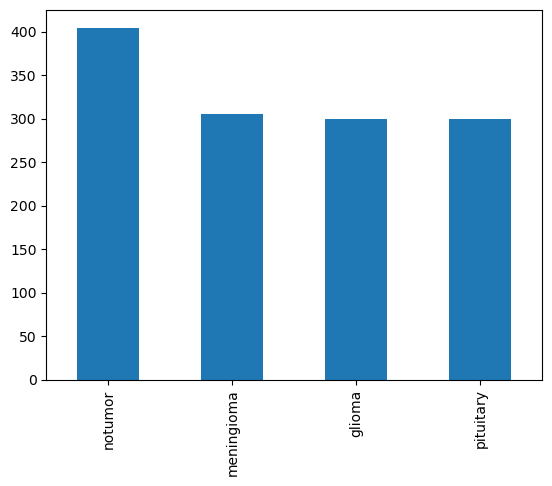

In [8]:
tumor_test_df['label'].value_counts().plot(kind = 'bar');

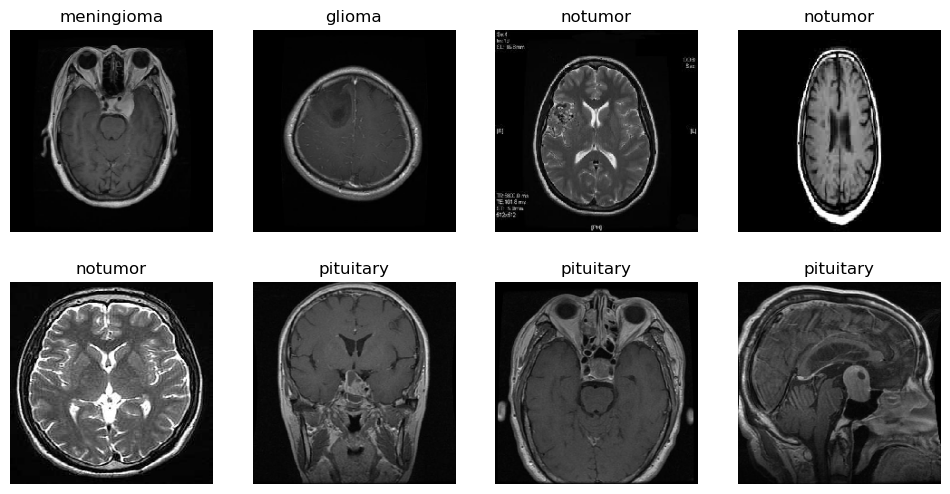

In [9]:
# with gratitude to MD Mushfirat Mohaimin for this code
# https://www.kaggle.com/code/mushfirat/brain-tumor-classification-accuracy-96

IMAGE_SIZE = (224, 224)

def open_images(paths):
    '''
    Given a list of paths to images, this function returns the images as arrays.
    '''
    images = []
    for path in paths:
        image = load_img(path, target_size=IMAGE_SIZE)
        images.append(image)
    return np.array(images, dtype=object)

images = open_images(train_paths[50:59])
labels = train_labels[50:59]
fig = plt.figure(figsize=(12, 6))
for x in range(1, 9):
    fig.add_subplot(2, 4, x)
    plt.axis('off')
    plt.title(labels[x])
    plt.imshow(images[x])
plt.rcParams.update({'font.size': 12})
plt.show()

In [10]:
# with gratitude to Ruslan Klymentiev for this function and the two cells below
# https://www.kaggle.com/code/ruslankl/brain-tumor-detection-v1-0-cnn-vgg-16
# and Adrian Rosebrock from pyimagesearch for the underlying concept
# https://pyimagesearch.com/2016/04/11/finding-extreme-points-in-contours-with-opencv/
def crop_imgs(set_name, add_pixels_value=0):
    """
    Finds the extreme points on the image and crops them
    """
    set_new = []
    for img in set_name:
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        gray = cv2.GaussianBlur(gray, (5, 5), 0)

        # threshold the image, then perform a series of erosions +
        # dilations to remove any small regions of noise
        thresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
        thresh = cv2.erode(thresh, None, iterations=2)
        thresh = cv2.dilate(thresh, None, iterations=2)

        # find contours in thresholded image, then grab the largest one
        cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        cnts = imutils.grab_contours(cnts)
        c = max(cnts, key=cv2.contourArea)

        # find the extreme points
        extLeft = tuple(c[c[:, :, 0].argmin()][0])
        extRight = tuple(c[c[:, :, 0].argmax()][0])
        extTop = tuple(c[c[:, :, 1].argmin()][0])
        extBot = tuple(c[c[:, :, 1].argmax()][0])

        ADD_PIXELS = add_pixels_value
        new_img = img[extTop[1]-ADD_PIXELS:extBot[1]+ADD_PIXELS, extLeft[0]-ADD_PIXELS:extRight[0]+ADD_PIXELS].copy()
        set_new.append(new_img)

    return np.array(set_new)

In [45]:
img = cv2.imread(train_paths[58])
img = cv2.resize(
            img,
            dsize=IMAGE_SIZE,
            interpolation=cv2.INTER_CUBIC
        )
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
gray = cv2.GaussianBlur(gray, (5, 5), 0)

# threshold the image, then perform a series of erosions +
# dilations to remove any small regions of noise
thresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
thresh = cv2.erode(thresh, None, iterations=2)
thresh = cv2.dilate(thresh, None, iterations=2)

# find contours in thresholded image, then grab the largest one
cnts = cv2.findContours(thresh.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
c = max(cnts, key=cv2.contourArea)

# find the extreme points
extLeft = tuple(c[c[:, :, 0].argmin()][0])
extRight = tuple(c[c[:, :, 0].argmax()][0])
extTop = tuple(c[c[:, :, 1].argmin()][0])
extBot = tuple(c[c[:, :, 1].argmax()][0])

# add contour on the image
img_cnt = cv2.drawContours(img.copy(), [c], -1, (0, 255, 255), 4)

# add extreme points
img_pnt = cv2.circle(img_cnt.copy(), extLeft, 8, (0, 0, 255), -1)
img_pnt = cv2.circle(img_pnt, extRight, 8, (0, 255, 0), -1)
img_pnt = cv2.circle(img_pnt, extTop, 8, (255, 0, 0), -1)
img_pnt = cv2.circle(img_pnt, extBot, 8, (255, 255, 0), -1)

# crop
new_img = img[extTop[1]:extBot[1], extLeft[0]:extRight[0]].copy()

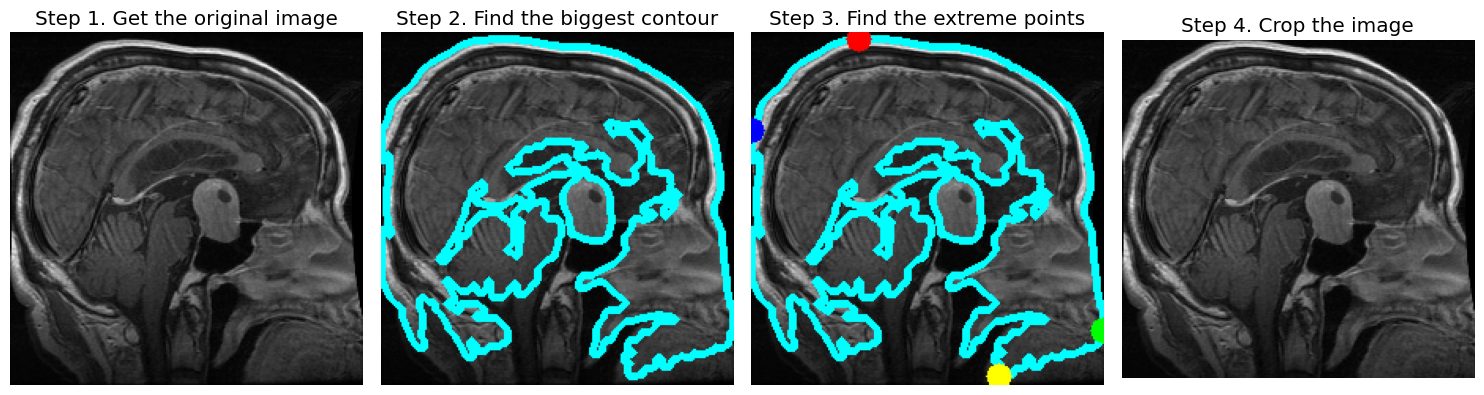

In [46]:
fig, axes = plt.subplots(ncols = 4, figsize=(15,6))
axes[0].axis('off')
axes[1].axis('off')
axes[2].axis('off')
axes[3].axis('off')

axes[0].imshow(img)
axes[0].set_title('Step 1. Get the original image')
axes[1].imshow(img_cnt)
axes[1].set_title('Step 2. Find the biggest contour')
axes[2].imshow(img_pnt)
axes[2].set_title('Step 3. Find the extreme points')
axes[3].imshow(new_img)
axes[3].set_title('Step 4. Crop the image')

plt.tight_layout()
plt.show()